## Note - I could not get this lab to work efficiently in the skill network environment so I completed it in my personal lab environment. It may look slightly different without the extra photos, etc.

In [44]:
!pip install pandas
!pip install numpy
!pip install seaborn 

In [45]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [46]:
import requests
import io
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    data = response.text  # or response.content if it's binary data
    df = pd.read_csv(io.StringIO(data))
    print(data[:500])  # Print first 500 characters to inspect the data
else:
    print("Failed to retrieve data")

FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
1,2010-06-04,Falcon 9,6104.959411764706,LEO,CCAFS SLC 40,None None,1,False,False,False,,1.0,0,B0003,-80.577366,28.5618571,0
2,2012-05-22,Falcon 9,525.0,LEO,CCAFS SLC 40,None None,1,False,False,False,,1.0,0,B0005,-80.577366,28.5618571,0
3,2013-03-01,Falcon 9,677.0,ISS,CCAFS SLC 40,None None,1,False,False,False,,1.0,0,B0007,-80.577366,28.56


In [47]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


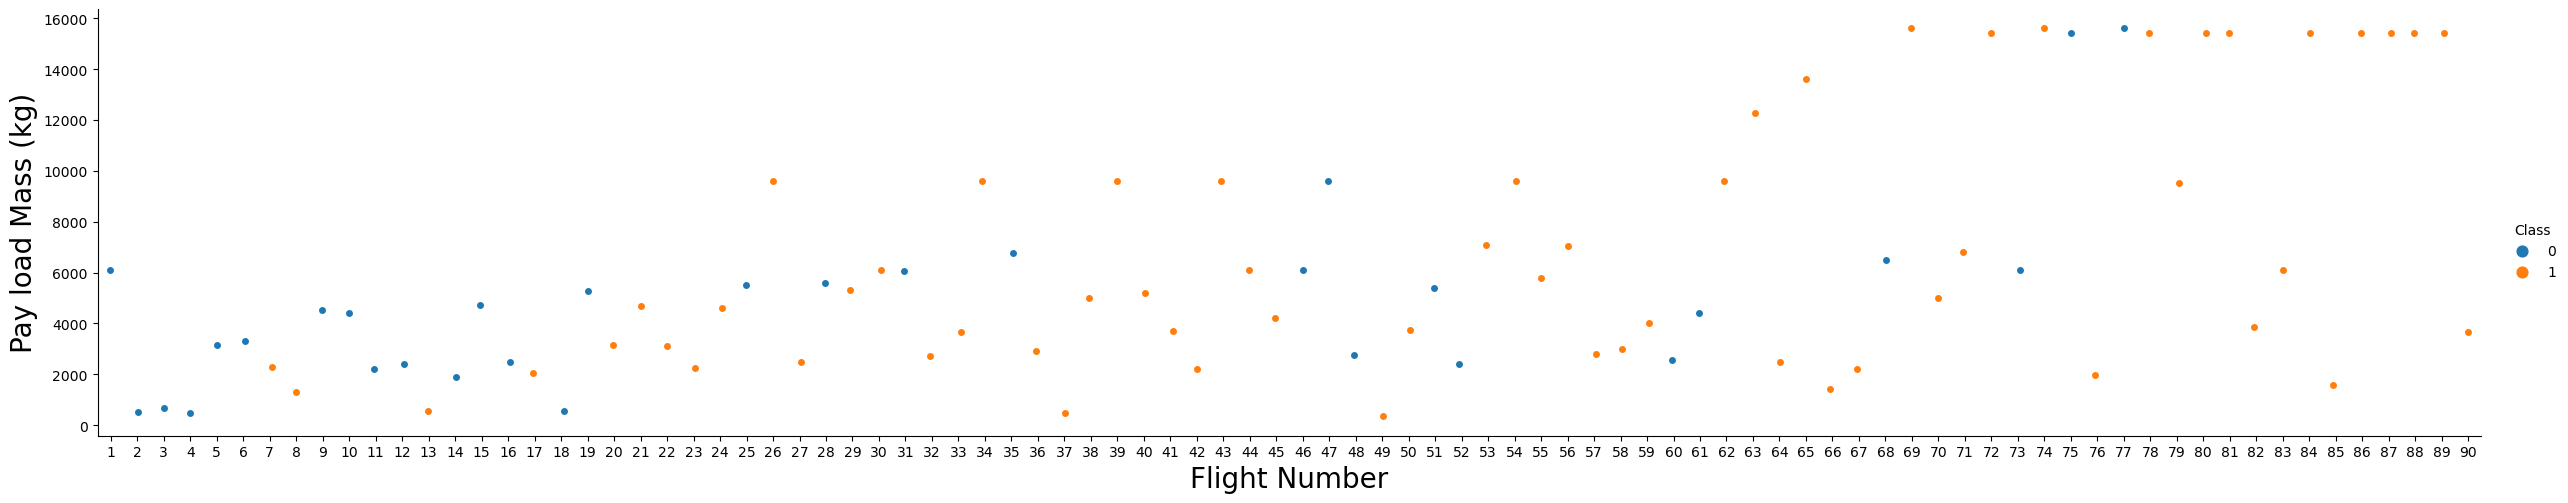

In [48]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

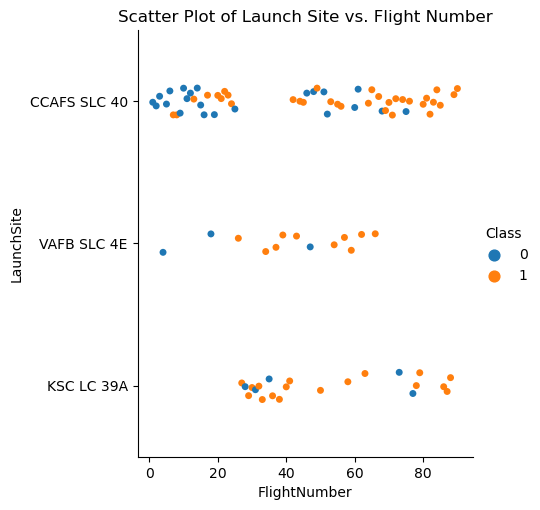

In [49]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)
plt.title('Scatter Plot of Launch Site vs. Flight Number')
plt.show()

### TASK 2: Visualize the relationship between Payload Mass and Launch Site

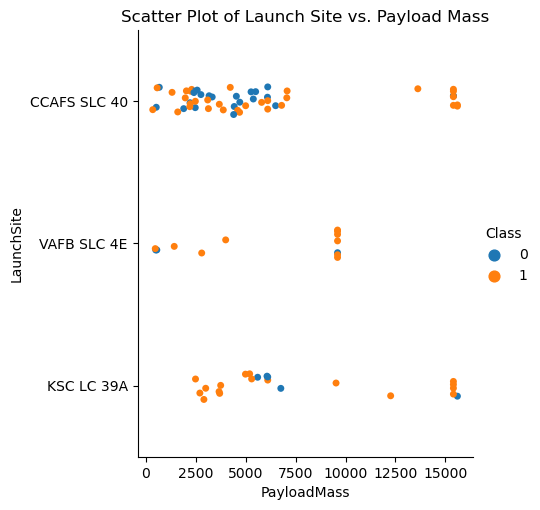

In [50]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.title('Scatter Plot of Launch Site vs. Payload Mass')
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a bar chart for the sucess rate of each orbit

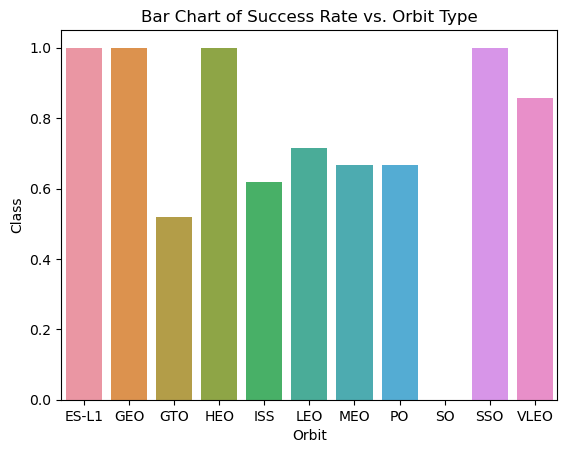

In [51]:
# HINT use groupby method on Orbit column and get the mean of Class column
df_orbit = df.groupby(by='Orbit')['Class'].mean().reset_index()
sns.barplot(x='Orbit', y='Class', data=df_orbit)
plt.title('Bar Chart of Success Rate vs. Orbit Type')
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


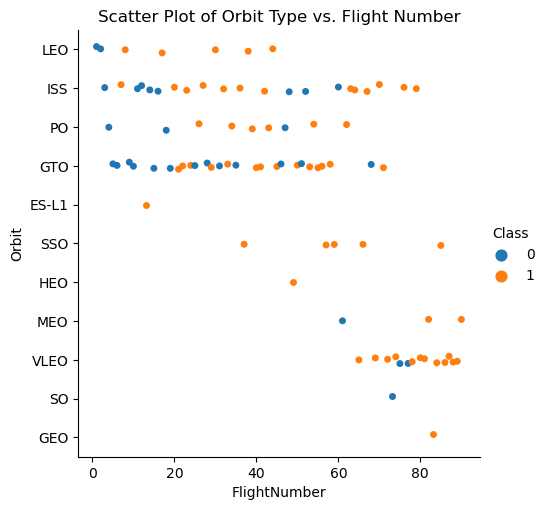

In [52]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.title('Scatter Plot of Orbit Type vs. Flight Number')
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

### TASK  5: Visualize the relationship between Payload Mass and Orbit type

Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


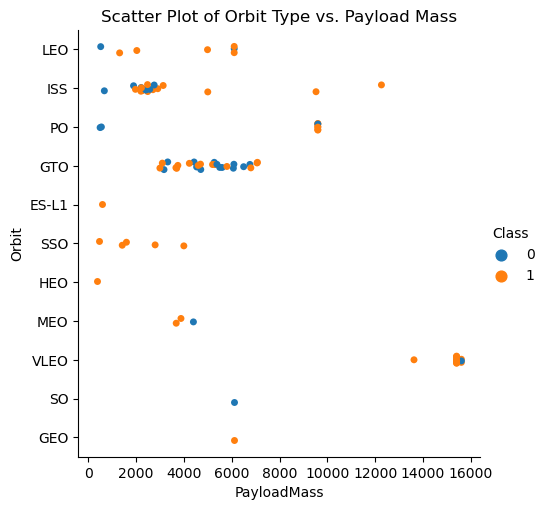

In [53]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.title('Scatter Plot of Orbit Type vs. Payload Mass')
plt.show()

### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.     
The function will help you get the year from the date:

In [54]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
df_year = df.groupby(by='Date')['Class'].mean().reset_index()


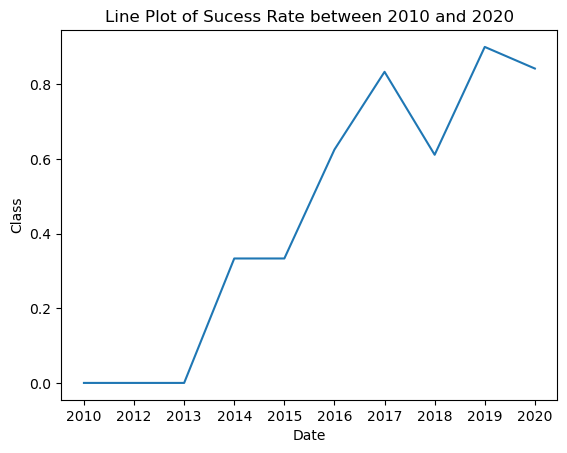

In [55]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

sns.lineplot(x='Date', y='Class', data=df_year)
plt.title('Line Plot of Sucess Rate between 2010 and 2020')
plt.show()

### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [56]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [57]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### TASK  8: Cast all numeric columns to `float64`


Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [58]:
# HINT: use astype function
features_one_hot = features_one_hot.astype(float)
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

In [59]:
len(df['Serial'].unique())

53

In [60]:
dfe = df
dfe.to_csv('dfe.csv', index=False)

## Additional exploration and analysis

### Explore outcome

In [61]:
df = df[df['FlightNumber'] >= 7]
df['PayloadMass'].max()
25/84

0.2976190476190476

In [62]:
df_outcome = (
    df.groupby('Outcome', as_index=False)
    .agg({'Class': ['count','mean','std'], 'PayloadMass': ['count','mean','std']})
)
df_outcome

Outcome Class           PayloadMass                          
               count mean  std       count         mean          std
0   False ASDS     6  0.0  0.0           6  6852.833333  6872.841200
1  False Ocean     1  0.0  NaN           1  2216.000000          NaN
2   False RTLS     1  0.0  NaN           1  2573.000000          NaN
3    None ASDS     2  0.0  0.0           2  3988.500000  2137.583800
4    None None    14  0.0  0.0          14  5382.272101  1781.224119
5    True ASDS    41  1.0  0.0          41  8440.584376  5120.225936
6   True Ocean     5  1.0  0.0           5  3602.400000  3622.666256
7    True RTLS    14  1.0  0.0          14  2988.115630  1564.853492

In [63]:
df_site = (
    df.groupby('LaunchSite', as_index=False)
    .agg({'Class': ['count','mean','std'], 'PayloadMass': ['count','mean','std']})
)
df_site

LaunchSite Class                     PayloadMass               \
                count      mean       std       count         mean   
0  CCAFS SLC 40    50  0.660000  0.478518          50  5826.989376   
1    KSC LC 39A    22  0.772727  0.428932          22  7606.450856   
2   VAFB SLC 4E    12  0.833333  0.389249          12  6371.083333   

                
           std  
0  4767.277487  
1  4883.564902  
2  4094.715274

In [64]:
df_site = (
    df.groupby(['LaunchSite','Orbit'], as_index=False)
    .agg({'Class': ['count','mean','std']})
)
df_site

LaunchSite  Orbit Class                    
                        count      mean       std
0   CCAFS SLC 40  ES-L1     1  1.000000       NaN
1   CCAFS SLC 40    GEO     1  1.000000       NaN
2   CCAFS SLC 40    GTO    16  0.500000  0.516398
3   CCAFS SLC 40    HEO     1  1.000000       NaN
4   CCAFS SLC 40    ISS    15  0.533333  0.516398
5   CCAFS SLC 40    LEO     3  1.000000  0.000000
6   CCAFS SLC 40    MEO     3  0.666667  0.577350
7   CCAFS SLC 40    SSO     1  1.000000       NaN
8   CCAFS SLC 40   VLEO     9  0.888889  0.333333
9     KSC LC 39A    GTO     9  0.666667  0.500000
10    KSC LC 39A    ISS     5  1.000000  0.000000
11    KSC LC 39A    LEO     2  1.000000  0.000000
12    KSC LC 39A     SO     1  0.000000       NaN
13    KSC LC 39A   VLEO     5  0.800000  0.447214
14   VAFB SLC 4E     PO     8  0.750000  0.462910
15   VAFB SLC 4E    SSO     4  1.000000  0.000000

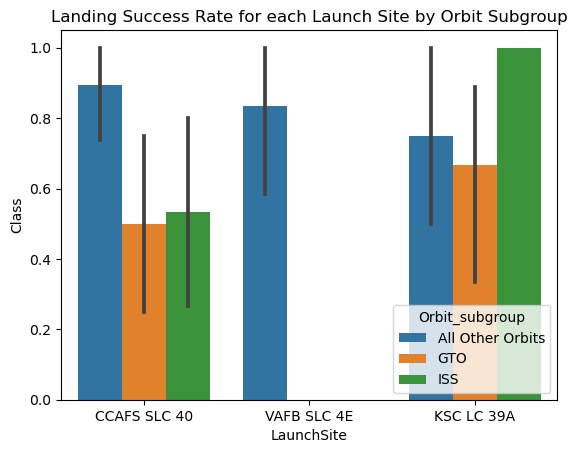

In [65]:
orbit_subgroup = []
for i in df['Orbit']:
    if i not in ['GTO', 'ISS']:
        i = 'All Other Orbits'
    orbit_subgroup.append(i)
   

orbit_subgroup = pd.Series(orbit_subgroup)
orbit_subgroup.name = 'Orbit_subgroup'
df['Orbit_subgroup'] = orbit_subgroup.values
df['Orbit_subgroup'] = df['Orbit_subgroup'].astype('category')

sns.barplot(data=df, x='LaunchSite', y='Class', hue='Orbit_subgroup')
plt.title('Landing Success Rate for each Launch Site by Orbit Subgroup')
plt.show()


In [66]:
df_site = (
    df.groupby(['LaunchSite','Legs'], as_index=False)
    .agg({'Class': ['count','mean','std'], 'PayloadMass': ['count','mean','std']})
)
df_site

LaunchSite   Legs Class                     PayloadMass               \
                       count      mean       std       count         mean   
0  CCAFS SLC 40  False     8  0.000000  0.000000           8  4322.481250   
1  CCAFS SLC 40   True    42  0.785714  0.415300          42  6113.562353   
2    KSC LC 39A  False     4  0.000000  0.000000           4  6133.989853   
3    KSC LC 39A   True    18  0.944444  0.235702          18  7933.664412   
4   VAFB SLC 4E  False     1  1.000000       NaN           1  9600.000000   
5   VAFB SLC 4E   True    11  0.818182  0.404520          11  6077.545455   

                
           std  
0  1422.929652  
1  5127.375421  
2   477.222644  
3  5366.290769  
4          NaN  
5  4160.047028

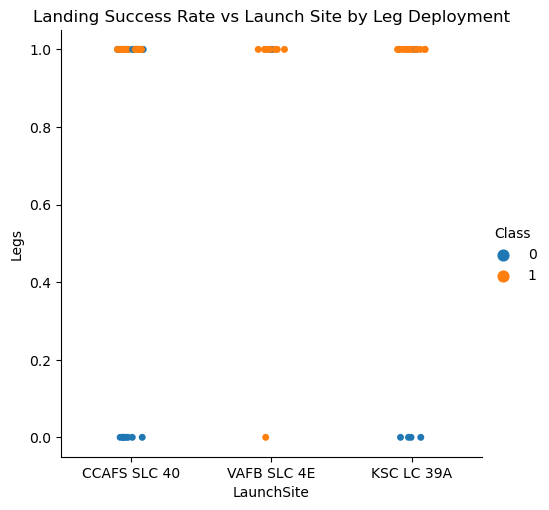

In [67]:
sns.catplot(data=df, x='LaunchSite', y='Legs', hue='Class')
plt.title('Landing Success Rate vs Launch Site by Leg Deployment')
plt.show()

In [68]:
bins = [0, 3120, 6240, 9360, 12480, 15600]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15']
df['Payload_bins'] = pd.cut(df['PayloadMass'], bins=bins, labels=labels, include_lowest=True)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Orbit_subgroup,Payload_bins
6,7,2014,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,ISS,0-3
7,8,2014,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,All Other Orbits,0-3
8,9,2014,Falcon 9,4535.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0,GTO,3-6
9,10,2014,Falcon 9,4428.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0,GTO,3-6
10,11,2014,Falcon 9,2216.0,ISS,CCAFS SLC 40,False Ocean,1,False,False,False,NaN,1.0,0,B1010,-80.577366,28.561857,0,ISS,0-3


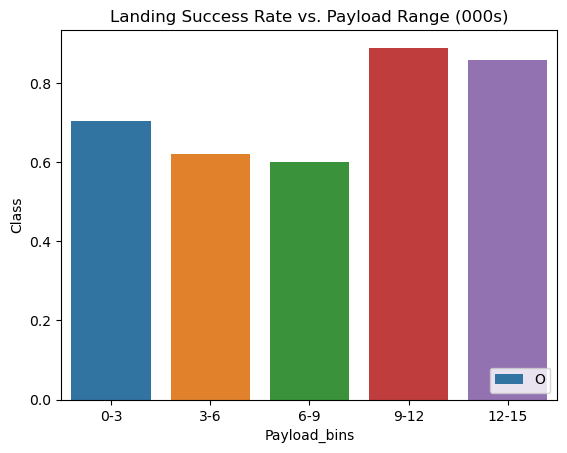

In [69]:
sns.barplot(data=df, x='Payload_bins', y='Class', ci=None)
plt.legend('Orbit subgroup', loc='lower right')
plt.title('Landing Success Rate vs. Payload Range (000s)')
plt.show()

In [70]:
len(df['Serial'].unique())

47